In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import portpy_photon as pp
from low_dim_rt import LowDimRT
# %run ex_wavelet.py

In [3]:
# specify the patient data location
# you first need to download the patient database from the link provided in the PortPy GitHub page
data_dir = r'..\data'
# pick a patient from the existing patient list to get detailed info about the patient data (e.g., beams_dict, structures, ...)
patient_id = 'Lung_Patient_1'
# create my_plan object for the planner beams_dict and select among the beams which are 30 degrees apart
# for the customized beams_dict, you can pass the argument beam_ids
my_plan = pp.Plan(patient_id, data_dir)


Creating BEV..
Loading sparse influence matrix...
Done


In [4]:
# run IMRT fluence map optimization using a low dimensional subspace for fluence map compression
sol = pp.Optimize.run_IMRT_fluence_map_CVXPy(my_plan, solver='MOSEK', opt_params={'smoothness_weight': 10})

creating rinds of size [5, 5, 20, 30, 500] mm ..
rinds created!!
Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                    v1.1.22                                    
(CVXPY) Feb 28 07:44:31 AM: Your problem has 67514 variables, 17 constraints, and 0 parameters.
(CVXPY) Feb 28 07:44:31 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 28 07:44:31 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 28 07:44:31 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 28

(CVXPY) Feb 28 07:46:20 AM: 23  4.4e-09  5.2e+00  1.5e-11  1.00e+00   2.873226810e+01   2.873226830e+01   1.9e-09  78.42 
(CVXPY) Feb 28 07:46:23 AM: 24  1.8e-09  2.8e+00  2.9e-12  1.00e+00   2.872551926e+01   2.872551929e+01   8.2e-10  81.16 
(CVXPY) Feb 28 07:46:23 AM: Optimizer terminated. Time: 81.64   
(CVXPY) Feb 28 07:46:23 AM: 
(CVXPY) Feb 28 07:46:23 AM: 
(CVXPY) Feb 28 07:46:23 AM: Interior-point solution summary
(CVXPY) Feb 28 07:46:23 AM:   Problem status  : PRIMAL_AND_DUAL_FEASIBLE
(CVXPY) Feb 28 07:46:23 AM:   Solution status : OPTIMAL
(CVXPY) Feb 28 07:46:24 AM:   Primal.  obj: 2.8725519260e+01    nrm: 6e+00    Viol.  con: 2e-08    var: 2e-05    cones: 0e+00  
(CVXPY) Feb 28 07:46:24 AM:   Dual.    obj: 2.8725519289e+01    nrm: 4e+05    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
----------------------------

In [5]:
sol_low_dim = LowDimRT.run_IMRT_fluence_map_low_dim(my_plan, solver='MOSEK', opt_params={'smoothness_weight': 10})

Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                    v1.1.22                                    
(CVXPY) Feb 28 07:51:04 AM: Your problem has 70514 variables, 23 constraints, and 0 parameters.
(CVXPY) Feb 28 07:51:04 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 28 07:51:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 28 07:51:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 28 07:51:04 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Fe

(CVXPY) Feb 28 07:56:52 AM: 25  2.5e-06  2.2e-02  7.2e-08  9.99e-01   1.969414190e+03   1.969414144e+03   1.1e-06  273.00
(CVXPY) Feb 28 07:57:00 AM: 26  1.4e-06  2.8e-02  2.9e-08  9.99e-01   1.966674730e+03   1.966674705e+03   6.1e-07  280.92
(CVXPY) Feb 28 07:57:07 AM: 27  8.1e-07  9.3e-02  1.3e-08  9.99e-01   1.965331989e+03   1.965331974e+03   3.6e-07  288.34
(CVXPY) Feb 28 07:57:15 AM: 28  6.4e-07  1.1e-01  9.2e-09  9.99e-01   1.964940665e+03   1.964940653e+03   2.9e-07  295.80
(CVXPY) Feb 28 07:57:22 AM: 29  4.8e-07  1.3e-01  6.0e-09  1.00e+00   1.964567682e+03   1.964567673e+03   2.1e-07  303.11
(CVXPY) Feb 28 07:57:31 AM: 30  1.1e-07  4.7e-01  1.1e-10  1.00e+00   1.963557773e+03   1.963557773e+03   1.5e-08  312.05
(CVXPY) Feb 28 07:57:40 AM: 31  3.9e-08  3.1e-01  2.5e-10  1.00e+00   1.963503943e+03   1.963503945e+03   6.0e-09  321.36
(CVXPY) Feb 28 07:57:50 AM: 32  3.7e-08  3.2e+00  2.5e-10  1.00e+00   1.963503865e+03   1.963503868e+03   6.0e-09  331.63
(CVXPY) Feb 28 07:58:00 

In [6]:
sol_low_dim_only = LowDimRT.run_IMRT_fluence_map_low_dim(my_plan, solver='MOSEK',
                                                         opt_params={'smoothness_weight': 0})

Objective Start
Objective done
Constraints Start
Constraints Done
Problem loaded
                                     CVXPY                                     
                                    v1.1.22                                    
(CVXPY) Feb 28 08:04:08 AM: Your problem has 70514 variables, 28 constraints, and 0 parameters.
(CVXPY) Feb 28 08:04:08 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 28 08:04:08 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 28 08:04:08 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 28 08:04:08 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Fe

(CVXPY) Feb 28 08:09:54 AM: 25  2.5e-06  7.0e-02  7.2e-08  9.99e-01   1.969414191e+03   1.969414145e+03   1.1e-06  264.45
(CVXPY) Feb 28 08:10:02 AM: 26  1.4e-06  8.3e-02  2.9e-08  9.99e-01   1.966674736e+03   1.966674710e+03   6.1e-07  272.89
(CVXPY) Feb 28 08:10:11 AM: 27  8.1e-07  1.3e-01  1.3e-08  9.99e-01   1.965331973e+03   1.965331958e+03   3.6e-07  281.99
(CVXPY) Feb 28 08:10:20 AM: 28  6.4e-07  2.3e-01  9.2e-09  9.99e-01   1.964940663e+03   1.964940652e+03   2.9e-07  290.74
(CVXPY) Feb 28 08:10:29 AM: 29  4.8e-07  2.9e-01  6.0e-09  1.00e+00   1.964567694e+03   1.964567685e+03   2.1e-07  299.52
(CVXPY) Feb 28 08:10:39 AM: 30  6.9e-08  8.1e-01  1.2e-10  1.00e+00   1.963557769e+03   1.963557769e+03   1.5e-08  309.99
(CVXPY) Feb 28 08:10:49 AM: 31  2.7e-08  1.9e+00  1.7e-10  1.00e+00   1.963504195e+03   1.963504192e+03   6.0e-09  319.61
(CVXPY) Feb 28 08:10:58 AM: 32  2.7e-08  1.9e+00  1.7e-10  1.00e+00   1.963504195e+03   1.963504192e+03   6.0e-09  328.88
(CVXPY) Feb 28 08:11:08 

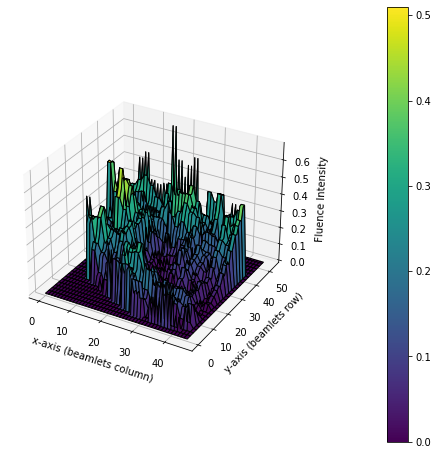

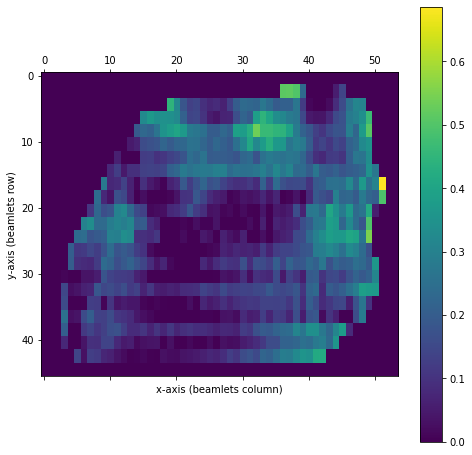

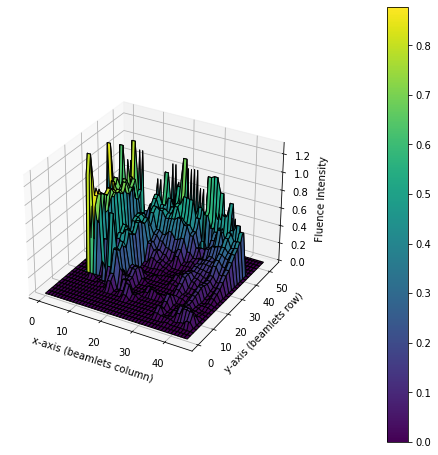

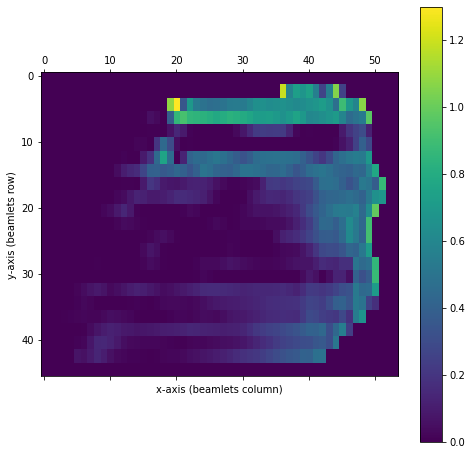

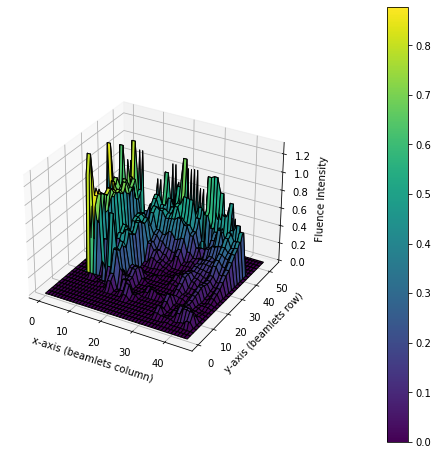

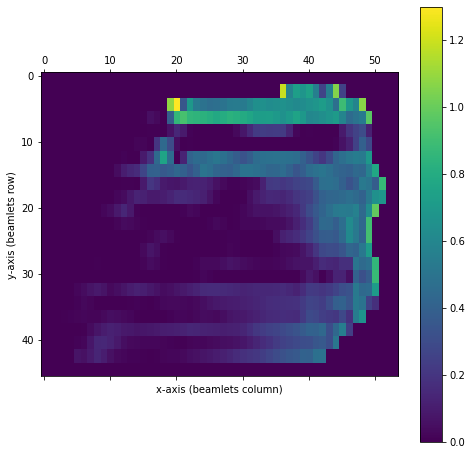

In [7]:
# plot fluence 3D and 2D
pp.Visualize.plot_fluence_3d(sol=sol, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol, beam_id=0)
pp.Visualize.plot_fluence_3d(sol=sol_low_dim, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol_low_dim, beam_id=0)
pp.Visualize.plot_fluence_3d(sol=sol_low_dim_only, beam_id=0)
pp.Visualize.plot_fluence_2d(sol=sol_low_dim_only, beam_id=0)

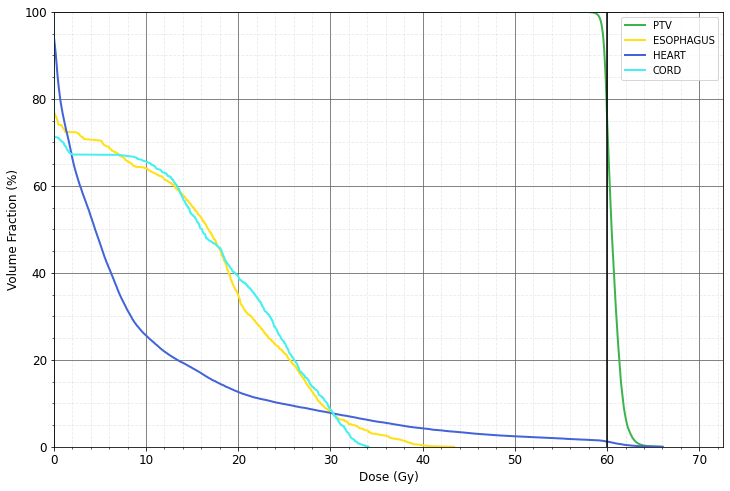

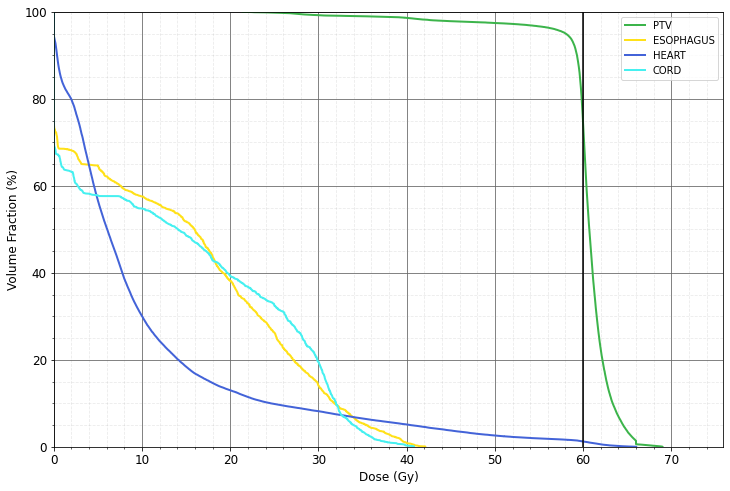

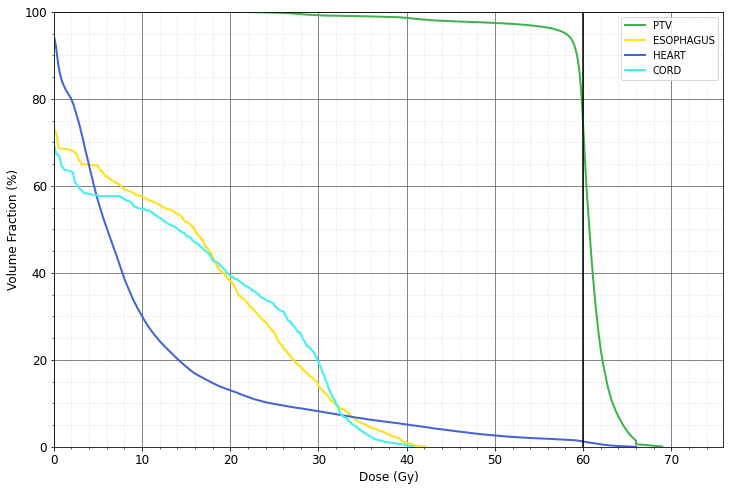

In [8]:
# plot DVH for the structures in the given list. Default dose_1d is in Gy and volume is in relative scale(%).
structs = ['PTV', 'ESOPHAGUS', 'HEART', 'CORD']
my_plan.plot_dvh(sol=sol, structs=structs)
my_plan.plot_dvh(sol=sol_low_dim, structs=structs)
my_plan.plot_dvh(sol=sol_low_dim_only, structs=structs)

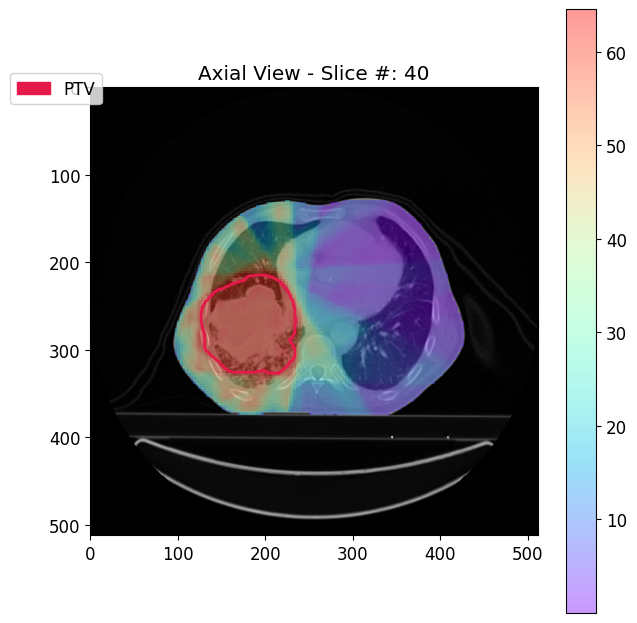

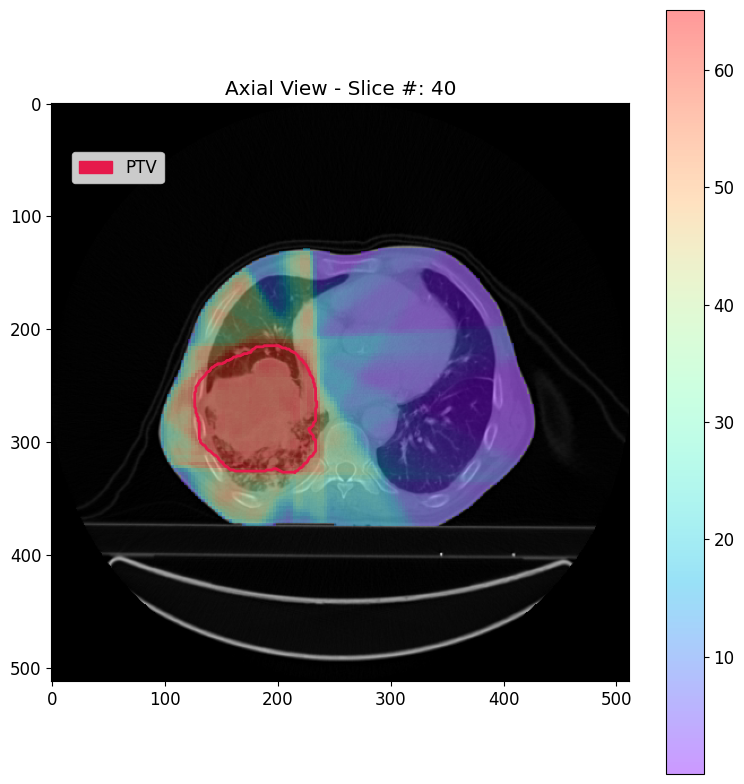

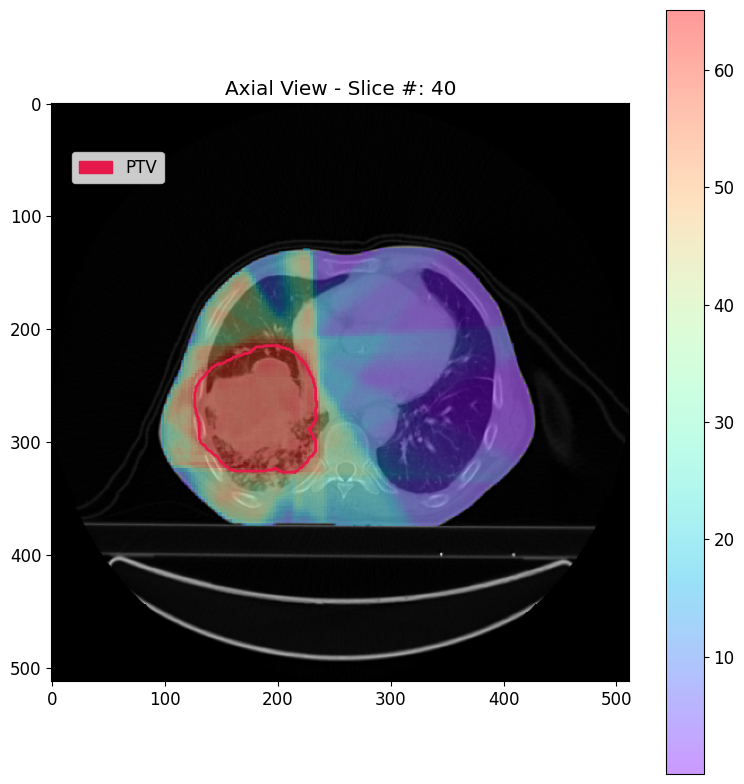

In [9]:
# plot 2d axial slice for the given solution and display the structures contours on the slice
pp.Visualize.plot_2d_dose(my_plan, sol=sol, show_isodose=False, slice_num=40, structs=['PTV'])
pp.Visualize.plot_2d_dose(my_plan, sol=sol_low_dim, show_isodose=False, slice_num=40, structs=['PTV'])
pp.Visualize.plot_2d_dose(my_plan, sol=sol_low_dim_only, show_isodose=False, slice_num=40, structs=['PTV'])

In [10]:
# visualize plan metrics based upon clinical criteria
pp.Visualize.plan_metrics(my_plan, sol=sol)
pp.Visualize.plan_metrics(my_plan, sol=sol_low_dim)
pp.Visualize.plan_metrics(my_plan, sol=sol_low_dim_only)


C:\Users\mtefagh\AppData\Roaming\Python\Python39\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html


C:\Users\mtefagh\AppData\Roaming\Python\Python39\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html
C:\Users\mtefagh\AppData\Roaming\Python\Python39\site-packages\portpy_photon\visualization.py:693: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()  # render to html
